In [152]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.optimize import curve_fit

In [3]:
cal1 = np.loadtxt("data/simple/calibracion_1ms.dat")
cal2 = np.loadtxt("data/simple/calibracion_2ms.dat")
cal5 = np.loadtxt("data/simple/calibracion_5ms.dat")
rabi = np.loadtxt("data/simple/RabiOsc_SBC_carrier_tobs=2ms.dat")

### Graficamos los datos de calibración

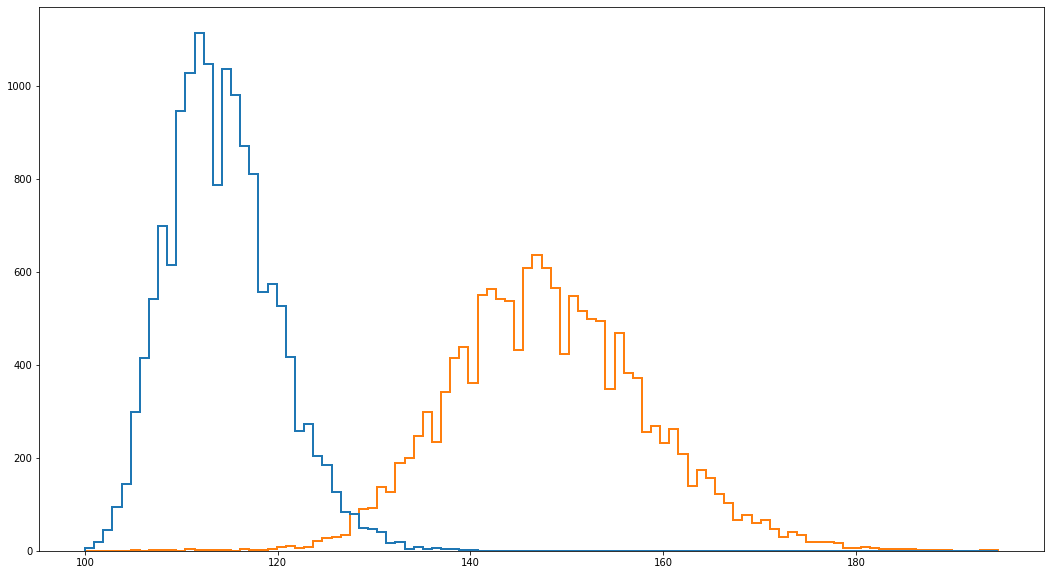

In [19]:
fig, ax = plt.subplots(1, figsize=(18,10))
ax.hist(cal1, bins=100, histtype="step", linewidth=2)
plt.show()

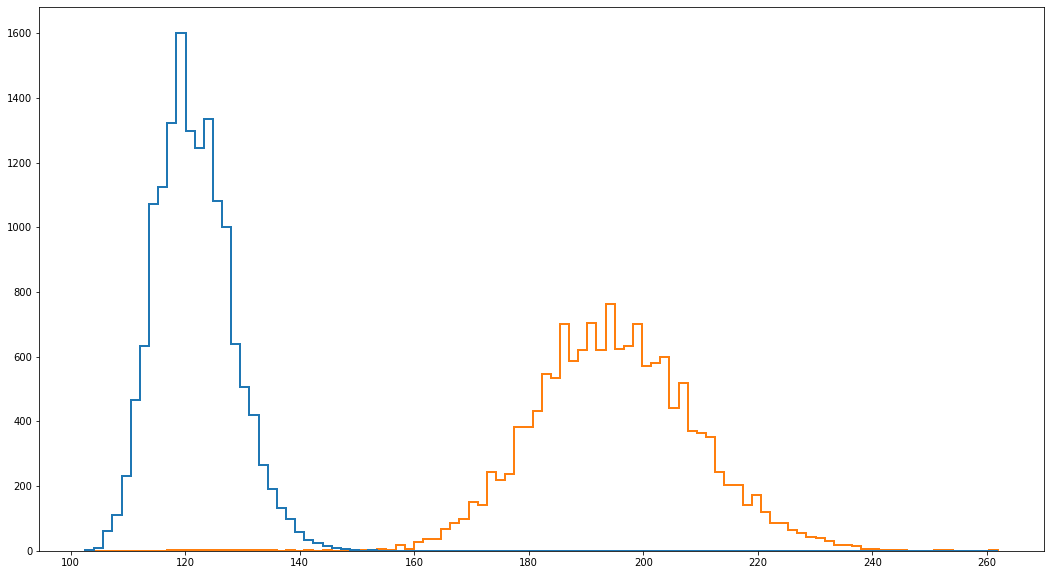

In [26]:
fig, ax = plt.subplots(1, figsize=(18,10))
ax.hist(cal2, bins=100, histtype="step", linewidth=2)
plt.show()

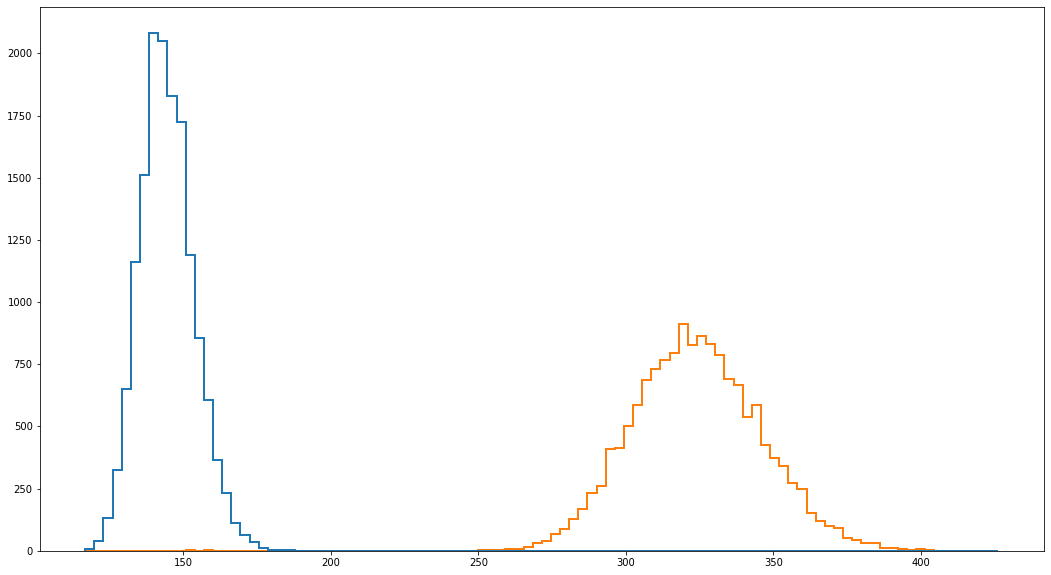

In [27]:
fig, ax = plt.subplots(1, figsize=(18,10))
ax.hist(cal5, bins=100, histtype="step", linewidth=2)
plt.show()

### Defino dist de Poisson y factorial

In [169]:
def factorial(arr):
    salida = np.ones(arr.shape[0])
    for index, num in enumerate(arr):
        for i in range(1, num+1):
            salida[index] *= i
    return salida

def poisson_mio(datos, lmb, offset, scale):
    datos = datos - offset
    num = scale * np.exp(-lmb) * lmb**k
    den = factorial(datos)
    return num/den



TypeError: 'numpy.float64' object cannot be interpreted as an integer

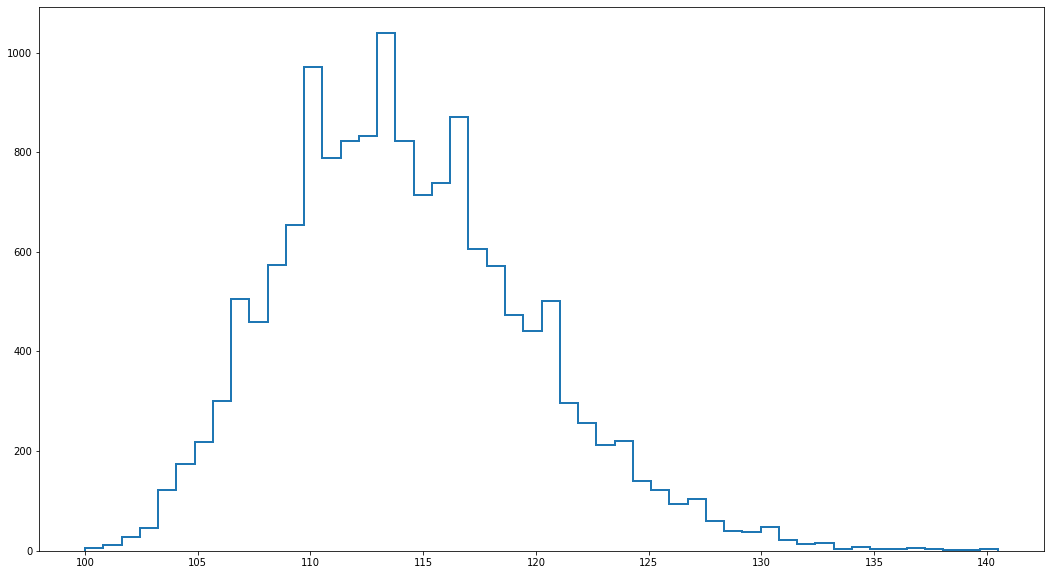

In [176]:
%matplotlib inline
data = cal1[:,0]





fig, ax = plt.subplots(1, figsize=(18,10))
count, edges, plot = ax.hist(data, bins=50, histtype="step", linewidth=2)

bin_middles = 0.5 * (edges[1:] + edges[:-1])

param, cov = curve_fit(poisson_mio, bin_middles, count.astype(int)) 

ax.plot(np.arange(50), *param)


plt.show()